# **KNN and Decision Tree**

In [92]:
if (!require('pacman')) install.packages('pacman')

In [93]:
pacman::p_load(caret, 
               GGally, 
               magrittr, 
               pacman,
               parallel, 
               randomForest, 
               rattle, 
               rio,
               tictoc, 
               tidyverse)

In [94]:
fileName <- './data/b5_df.rds'

In [95]:
# Load and Prepare Data
# Import Big 5 Data
df <- import(fileName) %>%
    print()

# A tibble: 18,837 x 8
     age gender engnat Extrav Neurot Agree Consc  Open
   <int> <fct>  <fct>   <dbl>  <dbl> <dbl> <dbl> <dbl>
 1    53 Male   Yes       4.4    1.1   4.6   4.7   4.3
 2    46 Female Yes       2.2    3.1   3.5   4.2   2.6
 3    14 Female No        3.5    4.6   3.8   4.9   4.5
 4    19 Female No        2.2    4.3   3.7   2.6   4.1
 5    25 Female No        3.4    3     4.4   3.4   3.4
 6    31 Female Yes       1.6    2.4   3.6   3.1   3.3
 7    20 Female Yes       4.6    2.1   4.5   2.8   4.1
 8    23 Male   No        3.9    1.5   4.1   4.4   4.2
 9    39 Female Yes       4.5    3.5   4.9   4.1   4.1
10    18 Female Yes       1.5    3.7   3.5   4     4.1
# ... with 18,827 more rows


[1] 4

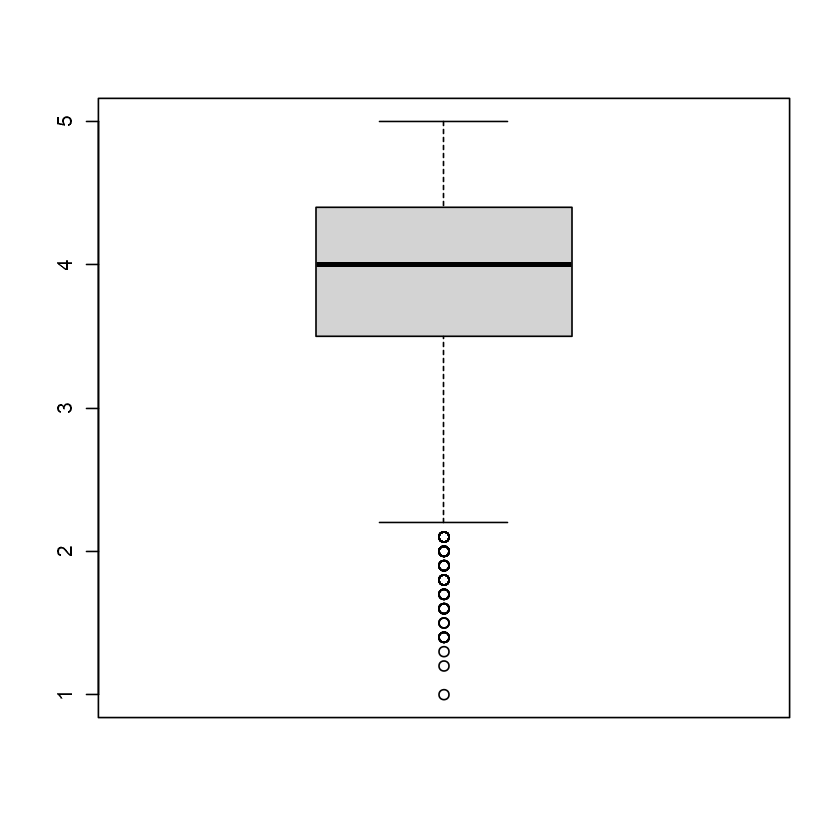

In [96]:
# Boxplot and median for "Open" (openess to experience)
df %>%
    pull(Open) %T>%
    boxplot() %>%
    median()

In [97]:
# Dichotomize "Open" for outcome
df %<>%
mutate(
    open_t = ifelse(
    Open >= 4,
    "High",
    "Low"),
    open_t = as_factor(open_t)
    ) %>%
    print()# Convert to factor

# A tibble: 18,837 x 9
     age gender engnat Extrav Neurot Agree Consc  Open open_t
   <int> <fct>  <fct>   <dbl>  <dbl> <dbl> <dbl> <dbl> <fct> 
 1    53 Male   Yes       4.4    1.1   4.6   4.7   4.3 High  
 2    46 Female Yes       2.2    3.1   3.5   4.2   2.6 Low   
 3    14 Female No        3.5    4.6   3.8   4.9   4.5 High  
 4    19 Female No        2.2    4.3   3.7   2.6   4.1 High  
 5    25 Female No        3.4    3     4.4   3.4   3.4 Low   
 6    31 Female Yes       1.6    2.4   3.6   3.1   3.3 Low   
 7    20 Female Yes       4.6    2.1   4.5   2.8   4.1 High  
 8    23 Male   No        3.9    1.5   4.1   4.4   4.2 High  
 9    39 Female Yes       4.5    3.5   4.9   4.1   4.1 High  
10    18 Female Yes       1.5    3.7   3.5   4     4.1 High  
# ... with 18,827 more rows


##### Explore Data

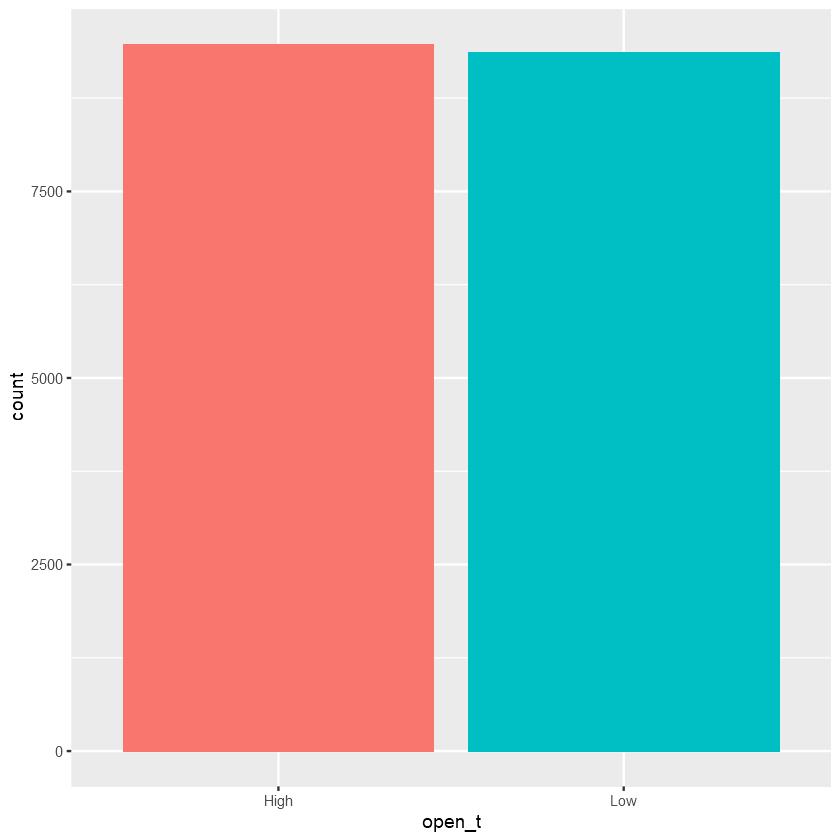

In [98]:
# Bar chart of "open_t"
df %>%
    ggplot()+
    geom_bar(
        aes(
            x = open_t, # Variable to chart
            fill =  open_t
        )
    )+
    theme(legend.position = 'none')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

Scatterplot matrix: 23.36 sec elapsed


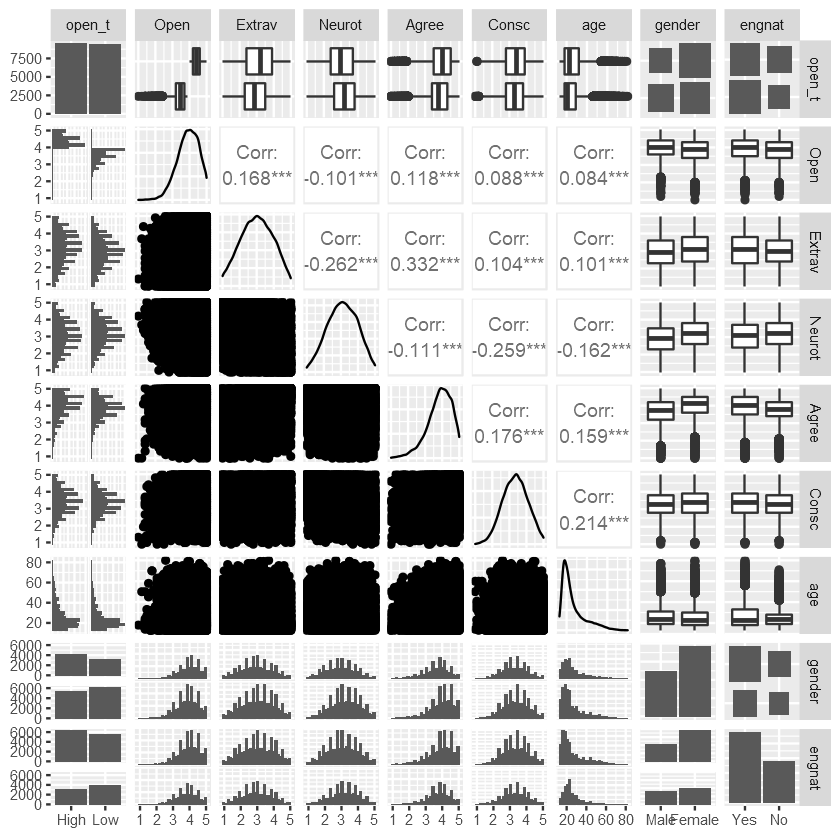

In [99]:
# Scatterplot matrix of all variables (takes a moment)
tic('Scatterplot matrix')
df %>%
    select( # Reorder variables
        open_t, # Put dichotomous "open" first
        Open, # Then quantitative "open"
        Extrav:Consc, #Then other Big 5
        age: engnat # Then demographics
    ) %>%
    ggpairs()
toc() # 15.404 sec to calculate, about 10 sec to appear

In [100]:
df %>%
    summary()

      age          gender      engnat          Extrav          Neurot     
 Min.   :13.0   Male  : 7326   Yes:11865   Min.   :1.000   Min.   :1.000  
 1st Qu.:18.0   Female:11511   No : 6972   1st Qu.:2.300   1st Qu.:2.500  
 Median :22.0                              Median :3.000   Median :3.100  
 Mean   :26.2                              Mean   :3.015   Mean   :3.094  
 3rd Qu.:31.0                              3rd Qu.:3.700   3rd Qu.:3.700  
 Max.   :80.0                              Max.   :5.000   Max.   :5.000  
     Agree           Consc            Open        open_t    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   High:9470  
 1st Qu.:3.400   1st Qu.:2.800   1st Qu.:3.500   Low :9367  
 Median :3.900   Median :3.400   Median :4.000              
 Mean   :3.847   Mean   :3.346   Mean   :3.909              
 3rd Qu.:4.400   3rd Qu.:3.900   3rd Qu.:4.400              
 Max.   :5.000   Max.   :5.000   Max.   :5.000              

##### **T-Test On Full Data**

In [101]:
# Just an example
df %>%
    t.test(Extrav ~ open_t, data=.)


	Welch Two Sample t-test

data:  Extrav by open_t
t = 18.371, df = 18724, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2182320 0.2703623
sample estimates:
mean in group High  mean in group Low 
          3.136589           2.892292 


In [102]:
# Simultaneous Entry Linear Regression
fit_lm <- df %>% # Use full data, save as "fit_lm"
    select(      # Put outcome first
        Open,    # Then quantitative "open"
        Extrav:Consc, # Then other Big 5
        age:engnat    # Then demographics
    ) %>%
    lm()     # Default linear regression

In [103]:
# Show model summary
fit_lm %>% summary()


Call:
lm(formula = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64690 -0.40035  0.03498  0.45182  1.51116 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.3476679  0.0400808  83.523  < 2e-16 ***
Extrav        0.0898844  0.0052319  17.180  < 2e-16 ***
Neurot       -0.0092399  0.0056025  -1.649   0.0991 .  
Agree         0.0689122  0.0068283  10.092  < 2e-16 ***
Consc         0.0433337  0.0064187   6.751 1.51e-11 ***
age           0.0019151  0.0004006   4.780 1.76e-06 ***
genderFemale -0.1666066  0.0094945 -17.548  < 2e-16 ***
engnatNo     -0.1055003  0.0092208 -11.442  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6054 on 18829 degrees of freedom
Multiple R-squared:  0.06057,	Adjusted R-squared:  0.06022 
F-statistic: 173.4 on 7 and 18829 DF,  p-value: < 2.2e-16


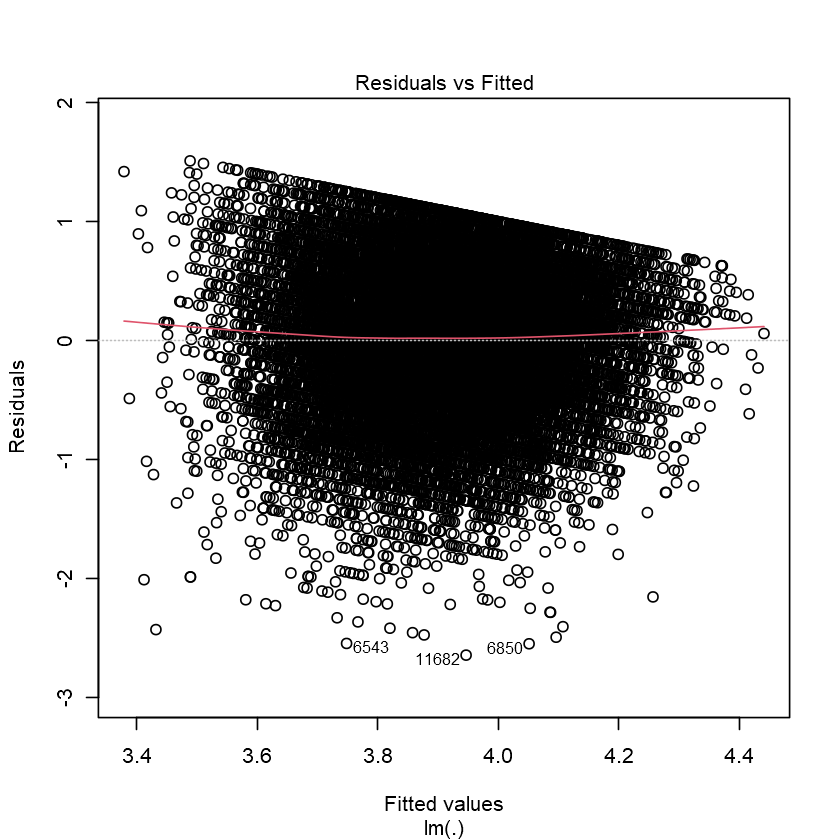

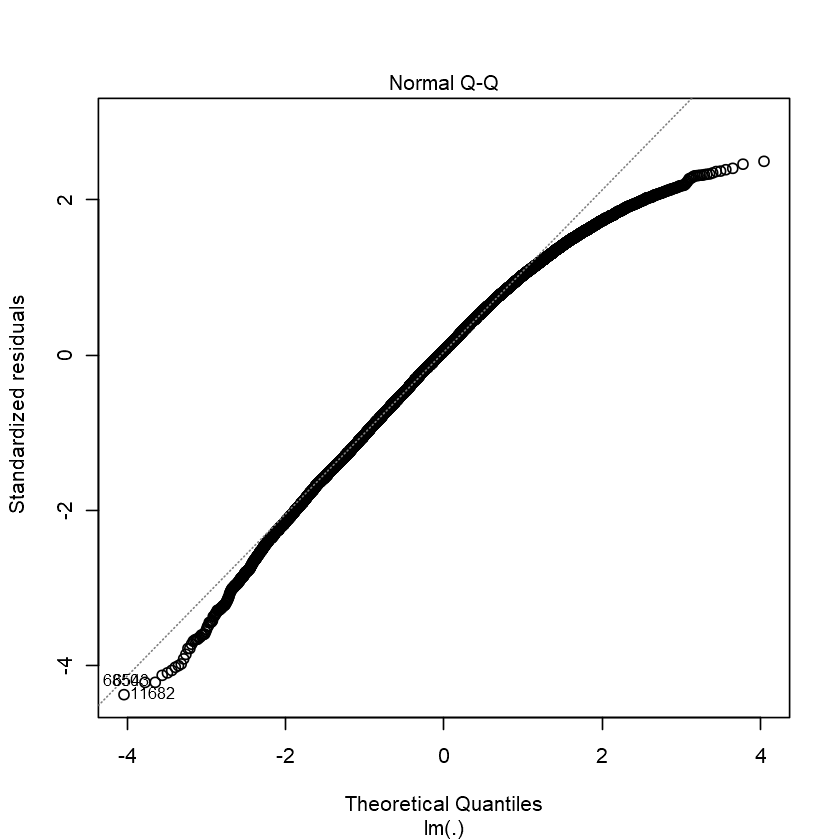

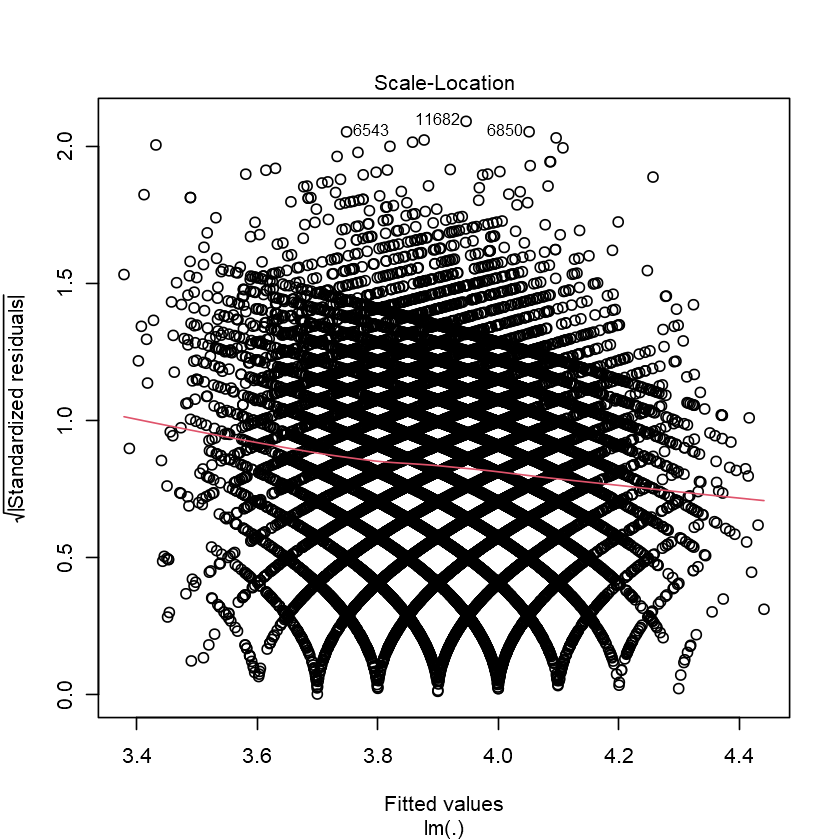

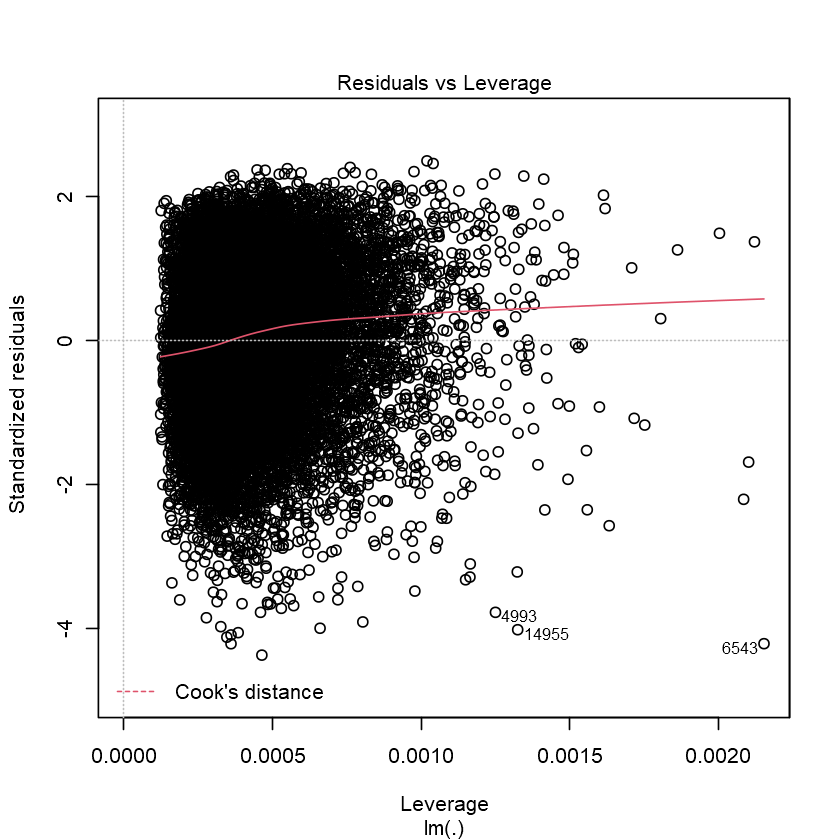

In [104]:
# Diagnostic plots; run command then hit return in Console
# 1: Residuals vs Fitted
# 2: Normal Q-Q
# 3: Scale-Location
# 4: Residuals vs. Leverage
fit_lm %>%
    plot()

##### Split Data For Machine Learning

In [105]:
# Set Random Seed
set.seed(333)

In [106]:
# Take random subsample to save time (total n = 18,837)
#df %<>% sample_n(1000)

In [107]:
# Split data into train and test sets
train <- df %>% sample_frac(.70) # Sample 70% of data
test <- anti_join(df, train) # use remaining cases

Joining, by = c("age", "gender", "engnat", "Extrav", "Neurot", "Agree", "Consc", "Open", "open_t")



##### KNN on Training Data

In [108]:
# Define Paramters
statctrl <- trainControl(
    method = 'repeatedcv', # Repeated cross-validation
    number = 10,           # Number of folds
    repeats = 3            # Number of complete sets of folds
)

In [109]:
# Define and save model
fit_knn <- train(
    open_t ~ age + gender + Extrav + Neurot + Agree + Consc,
    data = train,   # Use training data
    method = "knn",
    trControl = statctrl,
    tuneLength = 20,  # 20 dif values for k
    na.action = 'na.omit'
)

In [110]:
# Apply model to training data (takes a moment)
tic('k-NN')
fit_knn
toc()

k-Nearest Neighbors 

13186 samples
    6 predictor
    2 classes: 'High', 'Low' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 11867, 11867, 11868, 11867, 11868, 11867, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   5  0.5464878  0.09303443
   7  0.5516698  0.10341346
   9  0.5592035  0.11849353
  11  0.5635015  0.12710126
  13  0.5686085  0.13732431
  15  0.5703782  0.14087382
  17  0.5717690  0.14366493
  19  0.5737396  0.14760974
  21  0.5739415  0.14801979
  23  0.5729309  0.14600902
  25  0.5753328  0.15081889
  27  0.5757371  0.15163171
  29  0.5771280  0.15442140
  31  0.5792010  0.15857497
  33  0.5770520  0.15428226
  35  0.5768744  0.15393276
  37  0.5765203  0.15322771
  39  0.5771526  0.15449302
  41  0.5764955  0.15318687
  43  0.5754086  0.15101927

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 31.

k-NN: 0.01 sec elapsed


In [112]:
# Predict training set
open_p <- fit_knn %>% # "predicted"
    predict(newdata = train)

In [113]:
# Accuracy of model on training data
table(
    actualclass = train$open_t,
    predictedClass = open_p
) %>%
confusionMatrix() %>%
print()

Confusion Matrix and Statistics

           predictedClass
actualclass High  Low
       High 3528 3072
       Low  1877 4709
                                         
               Accuracy : 0.6247         
                 95% CI : (0.6163, 0.633)
    No Information Rate : 0.5901         
    P-Value [Acc > NIR] : 2.675e-16      
                                         
                  Kappa : 0.2495         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.6527         
            Specificity : 0.6052         
         Pos Pred Value : 0.5345         
         Neg Pred Value : 0.7150         
             Prevalence : 0.4099         
         Detection Rate : 0.2676         
   Detection Prevalence : 0.5005         
      Balanced Accuracy : 0.6290         
                                         
       'Positive' Class : High           
                                   

In [114]:
# KNN On Test Data

In [116]:
# Predict Test Set
open_p <- predict( # Create new variable ("predicted")
    fit_knn,    # Apply saved model
    newdata = test # Use test data
)

In [118]:
# Accuracy of model on test data
table(
    actualclass = test$open_t,
    predictedClass = open_p
) %>%
confusionMatrix() %>%
print()

Confusion Matrix and Statistics

           predictedClass
actualclass High  Low
       High 1407 1463
       Low   943 1838
                                          
               Accuracy : 0.5742          
                 95% CI : (0.5612, 0.5872)
    No Information Rate : 0.5841          
    P-Value [Acc > NIR] : 0.9362          
                                          
                  Kappa : 0.1507          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5987          
            Specificity : 0.5568          
         Pos Pred Value : 0.4902          
         Neg Pred Value : 0.6609          
             Prevalence : 0.4159          
         Detection Rate : 0.2490          
   Detection Prevalence : 0.5079          
      Balanced Accuracy : 0.5778          
                                          
       'Positive' Class : High            
               

##### **Decision Tree on Training Data**

In [121]:
tic('Decision tree')
fit_dt <- train(
    open_t ~ age + gender + Extrav + Neurot + Agree + Consc,
    data = train, # Use training data
    method = 'rpart', # Recursive partitioning
    trControl = trainControl(method='cv') # Cross-validate
)
toc() # 1.1 sec for n = 700; 1.8 sec for full data

Decision tree: 1.28 sec elapsed


In [122]:
# Show processing summary
fit_dt

CART 

13186 samples
    6 predictor
    2 classes: 'High', 'Low' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11867, 11868, 11867, 11867, 11868, 11868, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa     
  0.004555117  0.5792507  0.15854243
  0.032645005  0.5654474  0.13119156
  0.126935925  0.5169151  0.03328874

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.004555117.

In [123]:
# Description of Final Training Model
fit_dt$finalModel

n= 13186 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 13186 6586 High (0.5005309 0.4994691)  
  2) Extrav>=3.65 3512 1331 High (0.6210137 0.3789863) *
  3) Extrav< 3.65 9674 4419 Low (0.4567914 0.5432086)  
    6) Agree>=4.25 2471 1128 High (0.5435047 0.4564953) *
    7) Agree< 4.25 7203 3076 Low (0.4270443 0.5729557) *

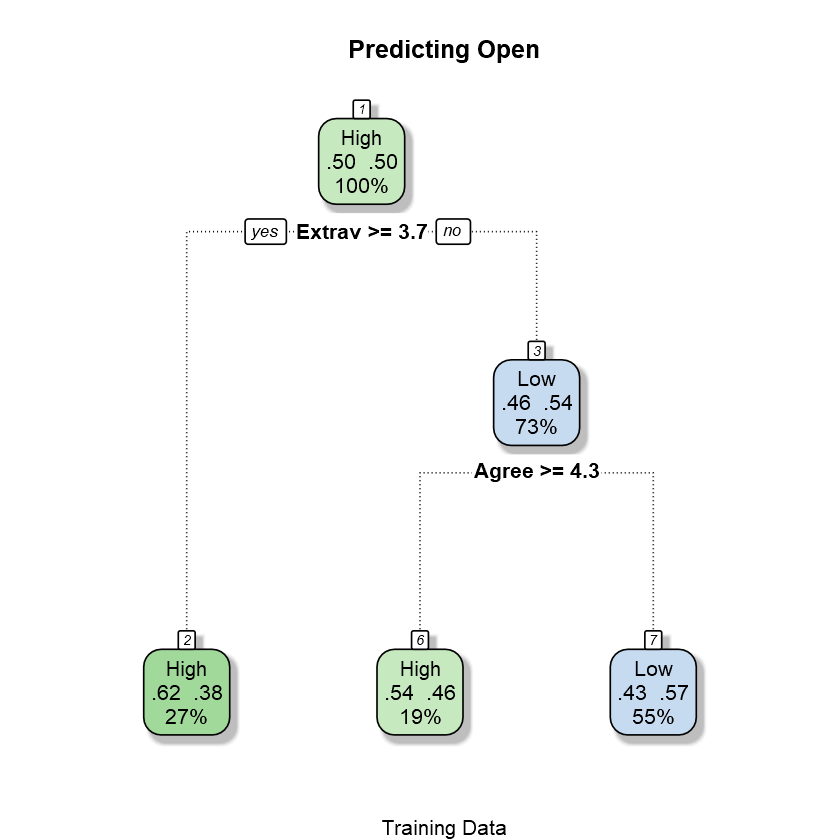

In [125]:
# Plot Final Training Model
fit_dt$finalModel %>%
    fancyRpartPlot(
        main= 'Predicting Open',
        sub='Training Data'
    )